In [1]:
import os
import pickle

with open('./model/model_fd1.pkl', 'rb') as f:
    model_fd1 = pickle.load(f)
with open('./model/model_fd2.pkl', 'rb') as f:
    model_fd2 = pickle.load(f)
with open('./model/model_max_norm.pkl', 'rb') as f:
    model_max_norm = pickle.load(f)
with open('./model/model_mean_norm.pkl', 'rb') as f:
    model_mean_norm = pickle.load(f)
with open('./model/model_msc.pkl', 'rb') as f:
    model_msc = pickle.load(f)
with open('./model/model_fd1.pkl', 'rb') as f:
    model_fd1 = pickle.load(f)
with open('./model/model_ori.pkl', 'rb') as f:
    model_ori = pickle.load(f)
with open('./model/model_range_norm.pkl', 'rb') as f:
    model_range_norm = pickle.load(f)
with open('./model/model_sg1.pkl', 'rb') as f:
    model_sg1 = pickle.load(f)
with open('./model/model_sg2.pkl', 'rb') as f:
    model_sg2 = pickle.load(f)
with open('./model/model_snv.pkl', 'rb') as f:
    model_snv = pickle.load(f)

In [2]:
import os
import pandas as pd
import joblib

# Path ke folder data
data_dir = '../../../prepossed_curated_data_2/kering/nir/protein'

# Membaca semua file CSV di folder
files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Membuat DataFrame untuk setiap file
for file in files:
    df_name = file.split('.')[0]  # Nama DataFrame berdasarkan nama file
    globals()[df_name] = pd.read_csv(os.path.join(data_dir, file))

# Verifikasi jumlah DataFrame yang dibuat

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_actual_vs_predicted(model, cal, val, target, name):
    # Prediksi pada data kalibrasi dan validasi
    y_cal_actual = cal[target]
    y_val_actual = val[target]
    X_cal = cal.drop(columns=[target])
    X_val = val.drop(columns=[target])
    y_cal_pred = model.predict(X_cal)
    y_val_pred = model.predict(X_val)
    
    n_cal = len(y_cal_actual)
    n_val = len(y_val_actual)
    df_pred = pd.DataFrame({
        'Cal_Actual': list(y_cal_actual) + [None]*n_val,
        'Cal_Predicted': list(y_cal_pred) + [None]*n_val,
        'Val_Actual': [None]*n_cal + list(y_val_actual),
        'Val_Predicted': [None]*n_cal + list(y_val_pred)
    })
    df_pred.to_csv(f'./plot_act_pred/{name}_actual_vs_predicted.csv', index=False)

    # Garis y=x
    min_val = min(y_cal_actual.min(), y_val_actual.min(), y_cal_pred.min(), y_val_pred.min())
    max_val = max(y_cal_actual.max(), y_val_actual.max(), y_cal_pred.max(), y_val_pred.max())

    plt.figure(figsize=(8, 6))
    plt.scatter(y_cal_actual, y_cal_pred, color='blue', label='Calibration', alpha=0.7)
    plt.scatter(y_val_actual, y_val_pred, color='red', label='Validation', alpha=0.7)
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Ideal')

    # # Garis trend untuk kalibrasi
    # if len(y_cal_actual) > 1:
    #     coef_cal = np.polyfit(y_cal_actual, y_cal_pred, 1)
    #     trend_cal = np.poly1d(coef_cal)
    #     plt.plot([min_val, max_val], trend_cal([min_val, max_val]), color='blue', linestyle='-', alpha=0.5, label='Trend Calibration')
    # # Garis trend untuk validasi
    # if len(y_val_actual) > 1:
    #     coef_val = np.polyfit(y_val_actual, y_val_pred, 1)
    #     trend_val = np.poly1d(coef_val)
    #     plt.plot([min_val, max_val], trend_val([min_val, max_val]), color='red', linestyle='-', alpha=0.5, label='Trend Validation')

    plt.title(f'Actual vs Predicted: {target}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig(f'./plot_act_pred/actual_vs_predicted_{name}_model.png')
    plt.show()


Plotting for model_fd1


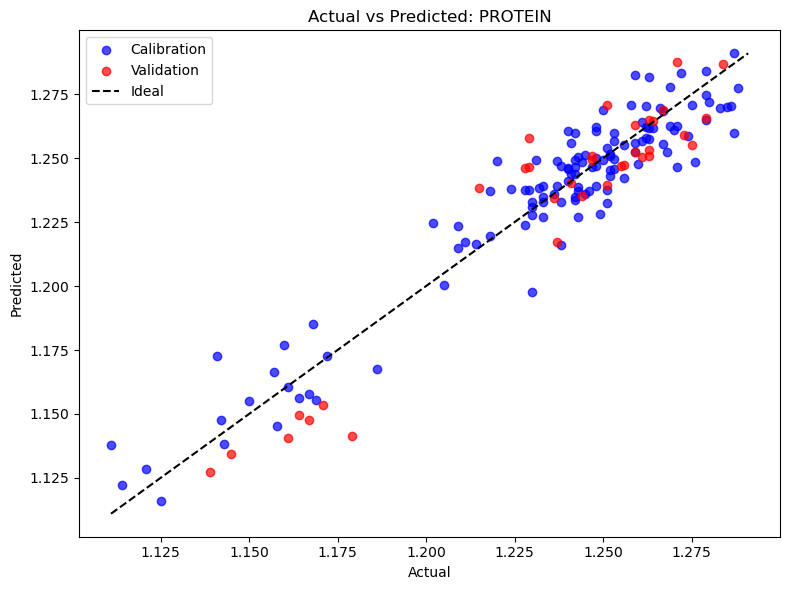

Plotting for model_fd2


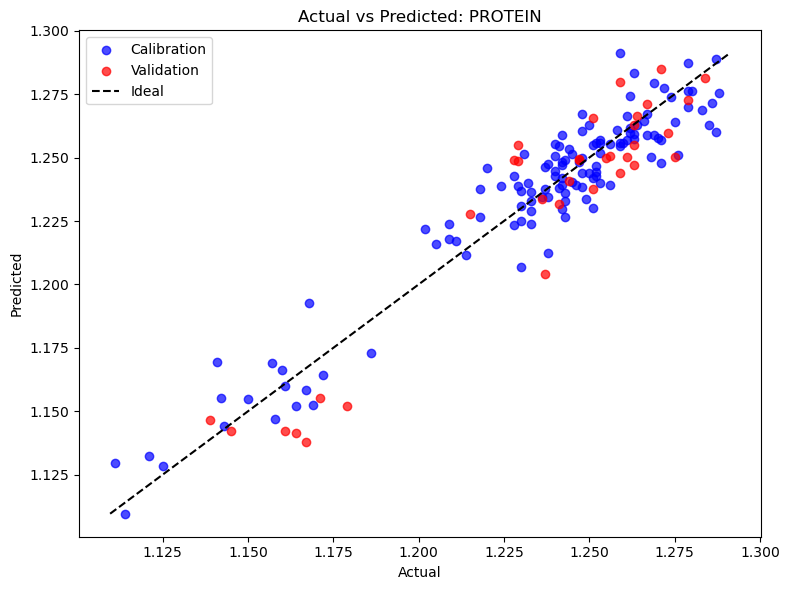

Plotting for model_max_norm


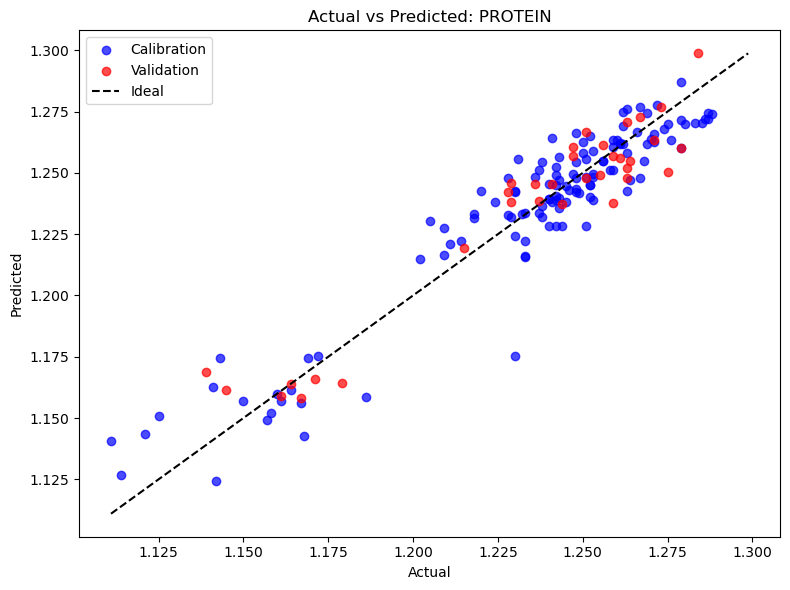

Plotting for model_mean_norm


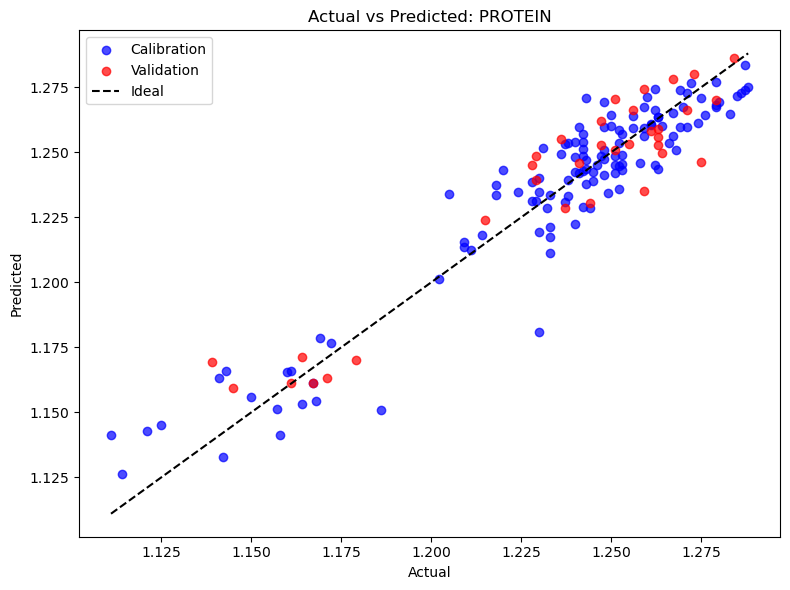

Plotting for model_msc


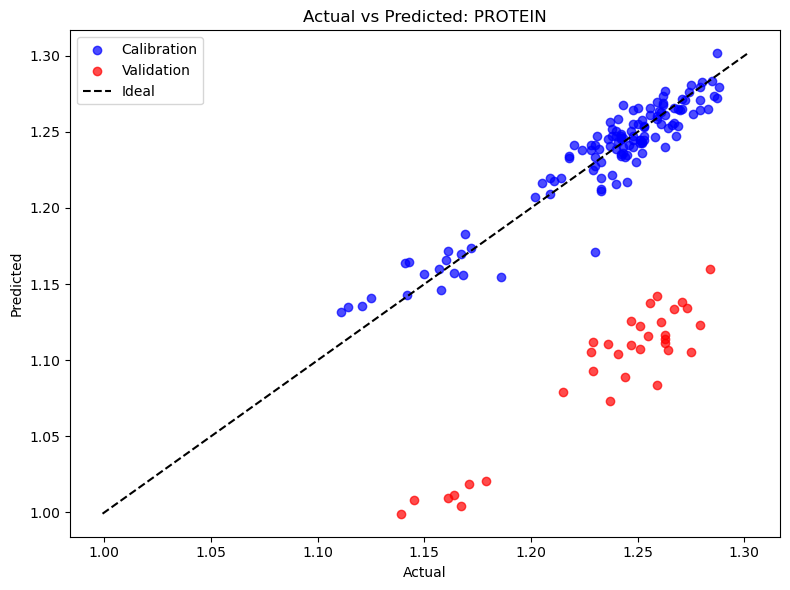

Plotting for model_ori


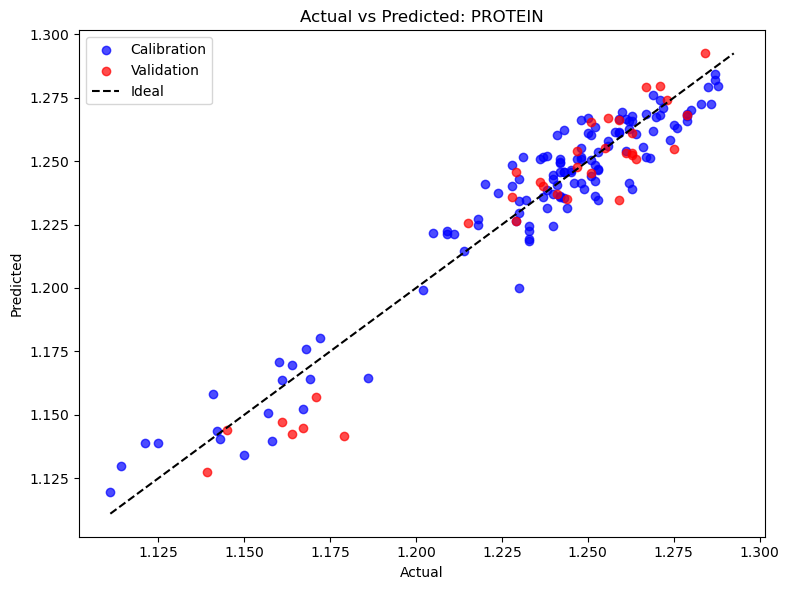

Plotting for model_range_norm


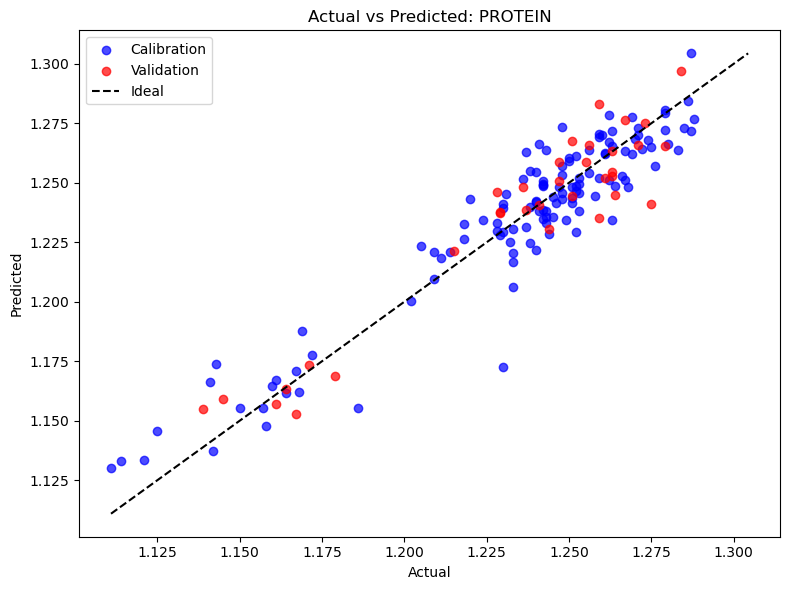

Plotting for model_sg1


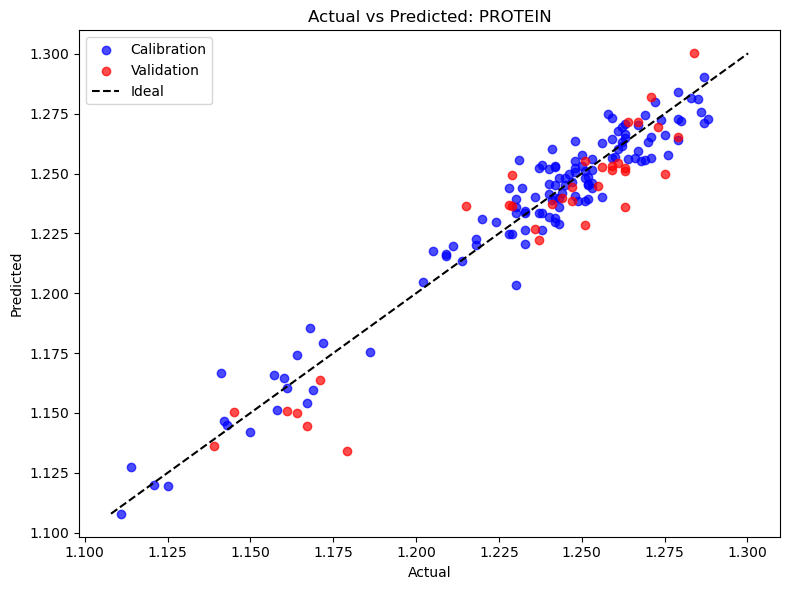

Plotting for model_sg2


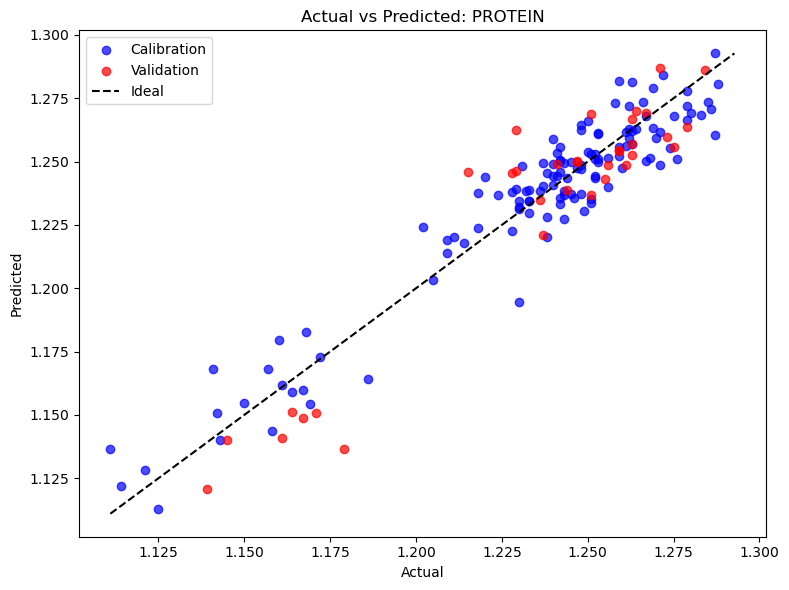

Plotting for model_snv


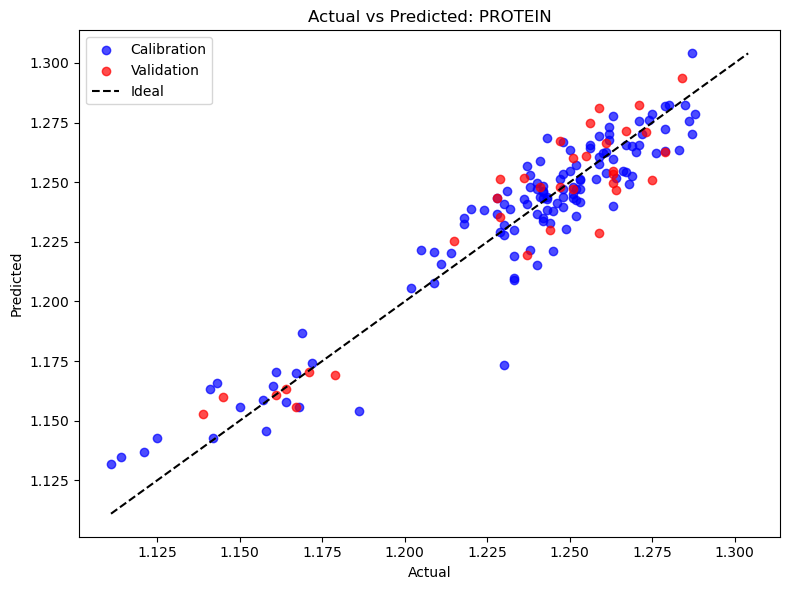

In [4]:
model_dict = {
    'model_fd1': (model_fd1, cal_fd1, val_fd1),
    'model_fd2': (model_fd2, cal_fd2, val_fd2),
    'model_max_norm': (model_max_norm, cal_max_norm, val_max_norm),
    'model_mean_norm': (model_mean_norm, cal_mean_norm, val_mean_norm),
    'model_msc': (model_msc, cal_msc, val_msc),
    'model_ori': (model_ori, cal_ori, val_ori),
    'model_range_norm': (model_range_norm, cal_range_norm, val_range_norm),
    'model_sg1': (model_sg1, cal_sg1, val_sg1),
    'model_sg2': (model_sg2, cal_sg2, val_sg2),
    'model_snv': (model_snv, cal_snv, val_snv),
}

for name, (model, cal, val) in model_dict.items():
    print(f"Plotting for {name}")
    plot_actual_vs_predicted(model, cal, val, 'PROTEIN',name)
    